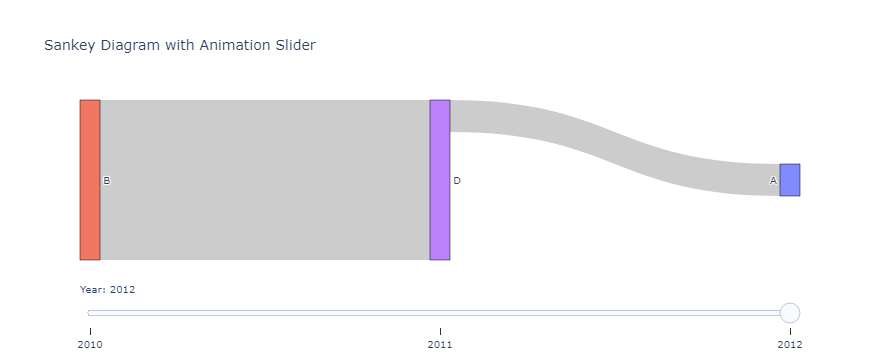

In [28]:
import pandas as pd
import plotly.graph_objects as go

# Sample DataFrame
df = pd.DataFrame({
    'source': ['A', 'B', 'A', 'C', 'B', 'D'],
    'target': ['B', 'C', 'D', 'A', 'D', 'A'],
    'value': [10, 15, 7, 20, 25, 5],
    'year': [2010, 2010, 2011, 2011, 2012, 2012]
})

# Create Sankey Diagram
fig = go.Figure()

unique_nodes = pd.unique(df[['source', 'target']].values.ravel('K'))

for year in df['year'].unique():
    filtered_df = df[df['year'] == year]

    sankey_trace = go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color='black', width=0.5),
            label=unique_nodes
        ),
        link=dict(
            source=filtered_df['source'].map(lambda x: unique_nodes.tolist().index(x)),
            target=filtered_df['target'].map(lambda x: unique_nodes.tolist().index(x)),
            value=filtered_df['value']
        )
    )

    fig.add_trace(sankey_trace)

# Add Animation Slider
steps = []
for i, year in enumerate(df['year'].unique()):
    step = dict(
        args=[
            {'visible': [False] * i + [True] + [False] * (len(df['year'].unique()) - i - 1)}
        ],
        label=str(year),
        method='update'
    )
    steps.append(step)

sliders = [dict(
    active=0,
    steps=steps,
    currentvalue={'prefix': 'Year: '},
)]

fig.update_layout(
    sliders=sliders,
    title='Sankey Diagram with Animation Slider',
    font_size=10
)

# Show the figure
fig.show()


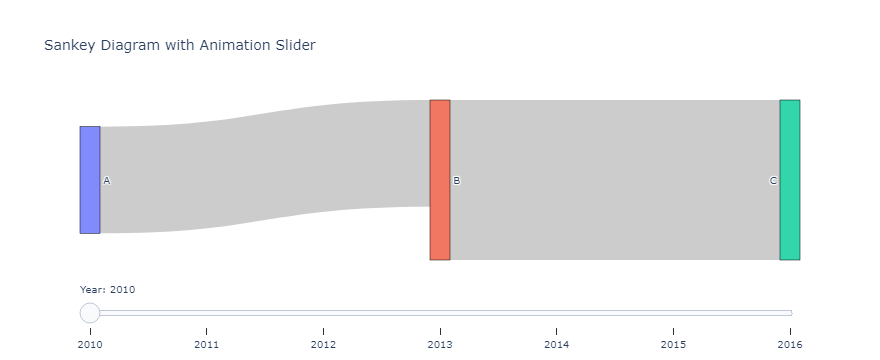

In [31]:
import pandas as pd
import plotly.graph_objects as go

# Sample DataFrame
df = pd.DataFrame({
    'source': ['A', 'B', 'A', 'C', 'B', 'D'],
    'target': ['B', 'C', 'D', 'A', 'D', 'A'],
    'value': [10, 15, 7, 20, 25, 5],
    'year': [2010, 2010, 2011, 2011, 2012, 2012]
})

# Add more data
new_data = {
    'source': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    'target': ['B', 'C', 'D', 'A', 'A', 'B', 'C'],
    'value': [15, 10, 5, 30, 8, 12, 18],
    'year': [2013, 2013, 2014, 2014, 2015, 2015, 2016]
}
df = pd.concat([df, pd.DataFrame(new_data)], ignore_index=True)

# Create Sankey Diagram
fig = go.Figure()

unique_nodes = pd.unique(df[['source', 'target']].values.ravel('K'))

for year in df['year'].unique():
    filtered_df = df[df['year'] == year]

    sankey_trace = go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color='black', width=0.5),
            label=unique_nodes
        ),
        link=dict(
            source=filtered_df['source'].map(lambda x: unique_nodes.tolist().index(x)),
            target=filtered_df['target'].map(lambda x: unique_nodes.tolist().index(x)),
            value=filtered_df['value']
        )
    )

    fig.add_trace(sankey_trace)

# Add Animation Slider
steps = []
for i, year in enumerate(df['year'].unique()):
    step = dict(
        args=[
            {'visible': [False] * i + [True] + [False] * (len(df['year'].unique()) - i - 1)}
        ],
        label=str(year),
        method='update'
    )
    steps.append(step)

sliders = [dict(
    active=0,
    steps=steps,
    currentvalue={'prefix': 'Year: '},
)]

fig.update_layout(
    sliders=sliders,
    title='Sankey Diagram with Animation Slider',
    font_size=10
)

# Show the figure
fig.show()


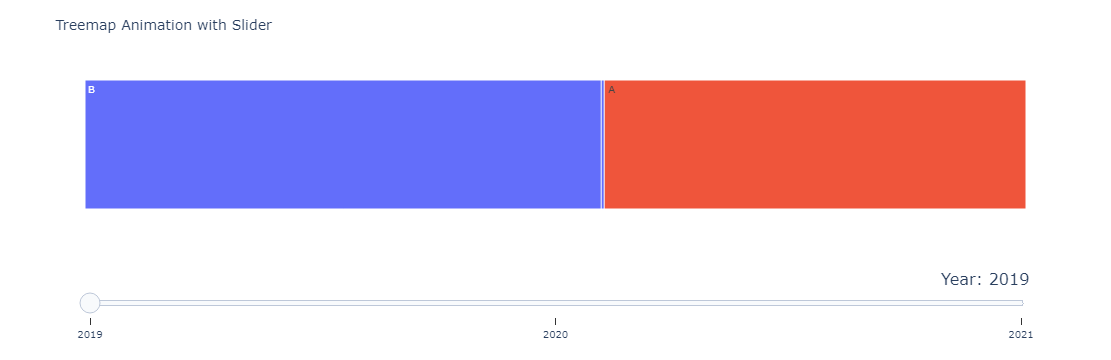

In [38]:
import plotly.express as px
import pandas as pd

# Example DataFrame
data = {'Year': [2019, 2019, 2020, 2020, 2021, 2021],
        'Category': ['A', 'B', 'A', 'B', 'A', 'B'],
        'Value': [10, 20, 15, 25, 18, 22]}

df = pd.DataFrame(data)

# Create an empty figure
fig = px.treemap()

# Iterate through unique years in the DataFrame
for year in df['Year'].unique():
    # Filter the DataFrame for the current year
    df_year = df[df['Year'] == year]
    
    # Create a trace for the treemap with hover data
    trace = px.treemap(df_year, path=['Category'], values='Value', title=f'Treemap for Year {year}', hover_data=['Value'])
    
    # Add the trace to the figure
    fig.add_trace(trace.data[0])

# # Add slider for animation
fig.update_layout(
    sliders=[{
        'active': 0,
        'yanchor': 'top',
        'xanchor': 'left',
        'currentvalue': {
            'font': {'size': 16},
            'prefix': 'Year:',
            'visible': True,
            'xanchor': 'right',
        },
        'transition': {'duration': 300, 'easing': 'cubic-in-out'},  # Adjust easing for smoother transitions
        'pad': {'b': 10, 't': 50},
        'steps': [{
            'label': f'{year}',
            'method': 'animate',
            'args': [{'frame': {'duration': 300, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 300, 'easing': 'cubic-in-out'}}],
        } for year in df['Year'].unique()]
    }]
)

# Set layout title
fig.update_layout(title='Treemap Animation Over Years')

# Add Animation Slider
steps = []
for i, year in enumerate(df['Year'].unique()):
    step = dict(
        args=[
            {'visible': [False] * i + [True] + [False] * (len(df['Year'].unique()) - i - 1)}
        ],
        label=str(year),
        method='update'
    )
    steps.append(step)

sliders = [dict(
    active=0,
    steps=steps,
    currentvalue={'prefix': 'Year: '},
)]

fig.update_layout(
    sliders=sliders,
    title='Treemap Animation with Slider',
    font_size=10
)

# Show the plot
fig.show()


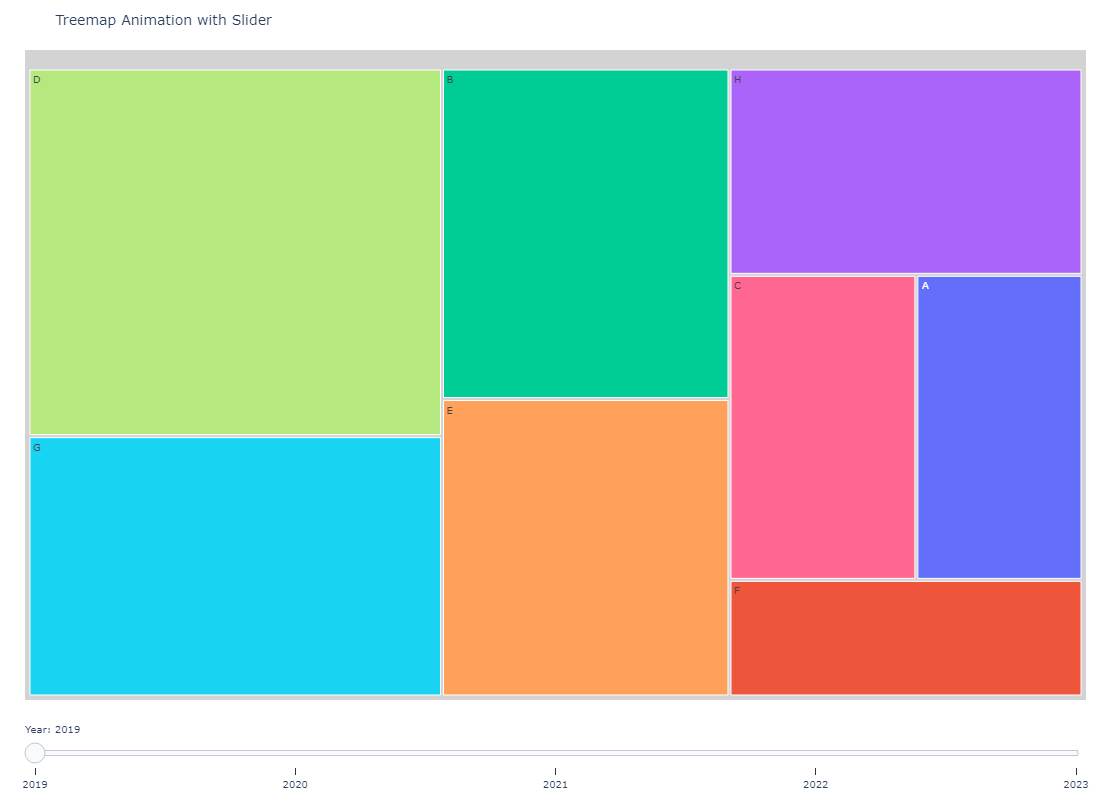

In [49]:
import plotly.express as px
import pandas as pd
import numpy as np

# Generate example DataFrame with more data
np.random.seed(42)
n_years = 5
n_categories = 8

data = {'Year': np.repeat(np.arange(2019, 2019 + n_years), n_categories),
        'Category': np.tile(list('ABCDEFGH')[:n_categories], n_years),
        'Value': np.random.randint(10, 50, size=n_years * n_categories)}

df = pd.DataFrame(data)

# Create an empty figure
fig = px.treemap()

# Iterate through unique years in the DataFrame
for year in df['Year'].unique():
    # Filter the DataFrame for the current year
    df_year = df[df['Year'] == year]
    
    # Create a trace for the treemap with hover data
    trace = px.treemap(df_year, path=['Category'], values='Value', title=f'Treemap for Year {year}', hover_data=['Value'])
    
    # Add the trace to the figure
    fig.add_trace(trace.data[0])



# Set layout title
fig.update_layout(title='Treemap Animation Over Years')

# Add Animation Slider
steps = []
for i, year in enumerate(df['Year'].unique()):
    step = dict(
        args=[
            {'visible': [False] * i + [True] + [False] * (len(df['Year'].unique()) - i - 1)}
        ],
        label=str(year),
        method='update'
    )
    steps.append(step)

sliders = [dict(
    active=0,
    steps=steps,
    currentvalue={'prefix': 'Year: '},
    transition={"easing":"elastic"}
)]

fig.update_layout(
    sliders=sliders,
    title='Treemap Animation with Slider',
    font_size=10
)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
# Show the plot
fig.show()


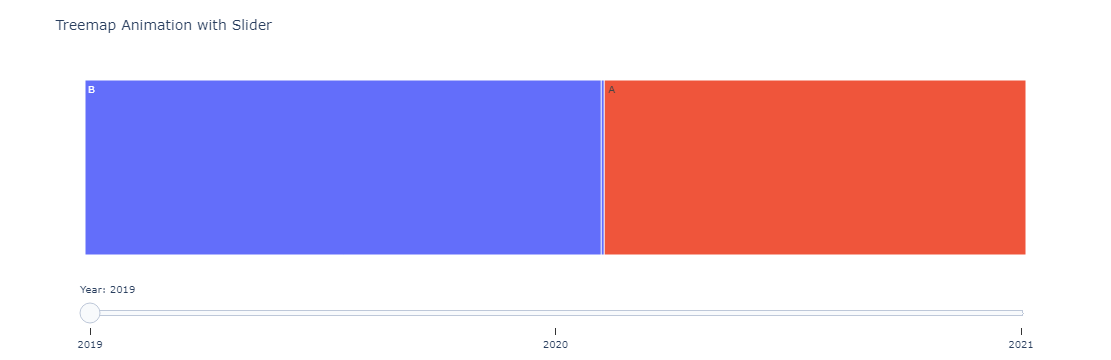

In [48]:
import plotly.express as px
import pandas as pd

# Example DataFrame
data = {'Year': [2019, 2019, 2020, 2020, 2021, 2021],
        'Category': ['A', 'B', 'A', 'B', 'A', 'B'],
        'Value': [10, 20, 15, 25, 18, 22]}

df = pd.DataFrame(data)

# Create an empty figure
fig = px.treemap()

# Iterate through unique years in the DataFrame
for year in df['Year'].unique():
    # Filter the DataFrame for the current year
    df_year = df[df['Year'] == year]
    
    # Create a trace for the treemap with hover data
    trace = px.treemap(df_year, path=['Category'], values='Value', title=f'Treemap for Year {year}', hover_data=['Value'])
    
    # Add the trace to the figure
    fig.add_trace(trace.data[0])


# Set layout title
fig.update_layout(title='Treemap Animation Over Years')

# Add Animation Slider
steps = []
for i, year in enumerate(df['Year'].unique()):
    step = dict(
        args=[
            {'visible': [False] * i + [True] + [False] * (len(df['Year'].unique()) - i - 1)}
        ],
        label=str(year),
        method='update'
    )
    steps.append(step)

sliders = [dict(
    active=0,
    steps=steps,
    currentvalue={'prefix': 'Year: '},
    transition={"easing":"elastic"}
)]

fig.update_layout(
    sliders=sliders,
    title='Treemap Animation with Slider',
    font_size=10
)

# Show the plot
fig.show()
